In [56]:
import mplfinance as mpf
import pymssql
import json
import pandas as pd
import numpy as np

db_settings = {
    "host": "127.0.0.1",
    "port": 1433,
    "user": "johnnyhsu",
    "password": "12345678",
    "database": "ncu_database",
    "charset": "UTF-8"
}

In [57]:
try:  
    conn = pymssql.connect(**db_settings)
    with conn.cursor() as cursor:
        command = "SELECT date, o, h, l, c, v FROM price_history WHERE stock_code = '2330' order by date asc;"
        cursor.execute(command)
        result = cursor.fetchall()
except Exception as ex:
    print(ex)

conn.close()

In [58]:
arr = []
for r in result:
    r = list(r)
    r[0] = r[0]
    r[1] = float(r[1])
    r[2] = float(r[2])
    r[3] = float(r[3])
    r[4] = float(r[4])
    r[5] = float(r[5])
    arr.append(r)

In [94]:
arr_df = pd.DataFrame(arr)
arr_df.index = pd.to_datetime(arr_df[0])
arr_df = arr_df.drop(columns=[0])
arr_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
arr_df.index.name = "Date"
arr_df

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,530.0,540.0,528.0,536.0,33316.0
2021-01-05,536.0,542.0,535.0,542.0,28512.0
2021-01-06,555.0,555.0,541.0,549.0,55462.0
2021-01-07,554.0,570.0,553.0,565.0,47905.0
2021-01-08,580.0,580.0,571.0,580.0,56426.0
...,...,...,...,...,...
2023-03-01,504.0,522.0,504.0,522.0,31738.0
2023-03-02,519.0,520.0,515.0,519.0,14320.0
2023-03-03,524.0,525.0,516.0,516.0,22160.0


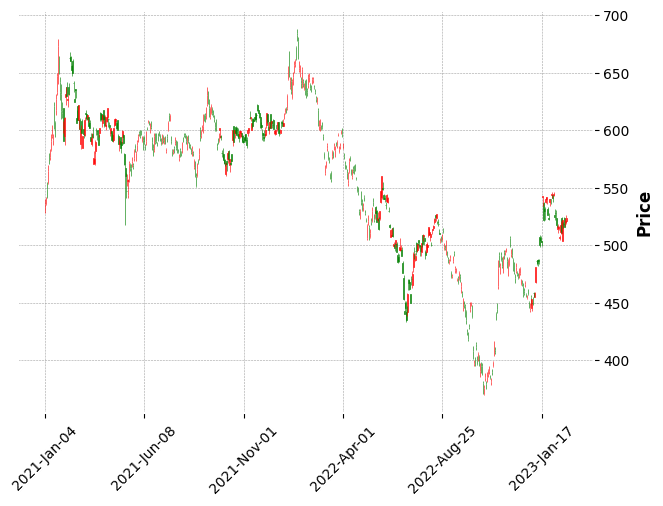

In [60]:
mc = mpf.make_marketcolors(up='r',
                           down='g',
                           edge='',
                           wick='inherit',
                           volume='inherit')
s = mpf.make_mpf_style(base_mpf_style='charles', marketcolors=mc)

mpf.plot(arr_df, type='candle', style=s)

In [119]:
try:  
    conn = pymssql.connect(**db_settings)
    with conn.cursor() as cursor:
        command = "SELECT date, buy_or_sell, (today_c*stock_count+current_total) FROM Buy_stock('2330') order by date asc;"
        cursor.execute(command)
        result = cursor.fetchall()
except Exception as ex:
    print(ex)

conn.close()

In [120]:
print(result)

[(datetime.date(2021, 1, 15), '1', 0.0), (datetime.date(2021, 1, 22), '1', 48.0), (datetime.date(2021, 2, 1), '1', -66.0), (datetime.date(2021, 2, 2), '1', 81.0), (datetime.date(2021, 2, 17), '1', 546.0), (datetime.date(2021, 2, 25), '1', -322.0), (datetime.date(2021, 3, 3), '-1', -1141.0), (datetime.date(2021, 3, 19), '-1', -3063.0), (datetime.date(2021, 4, 7), '1', -1923.0), (datetime.date(2021, 4, 21), '-1', -3021.0), (datetime.date(2021, 5, 6), '-1', -3321.0), (datetime.date(2021, 6, 2), '1', -2857.0), (datetime.date(2021, 6, 4), '1', -2857.0), (datetime.date(2021, 6, 23), '1', -2857.0), (datetime.date(2021, 6, 29), '1', -2857.0), (datetime.date(2021, 8, 5), '1', -2784.0), (datetime.date(2021, 8, 27), '1', -2517.0), (datetime.date(2021, 9, 7), '1', 387.0), (datetime.date(2021, 9, 30), '-1', -7568.0), (datetime.date(2021, 10, 5), '-1', -9040.0), (datetime.date(2021, 10, 22), '1', -3944.0), (datetime.date(2021, 11, 5), '1', -3944.0), (datetime.date(2021, 12, 7), '1', -2649.0), (datet

In [121]:
arr_buy = []
arr_sell = []

for r in result:
    r = list(r)
    r[0] = r[0]
    r[1] = int(r[1])
    r[2] = int(r[2])
    if r[1] == 1:
        arr_buy.append(r)
    else:
        arr_sell.append(r)

In [122]:
print(arr_buy)

[[datetime.date(2021, 1, 15), 1, 0], [datetime.date(2021, 1, 22), 1, 48], [datetime.date(2021, 2, 1), 1, -66], [datetime.date(2021, 2, 2), 1, 81], [datetime.date(2021, 2, 17), 1, 546], [datetime.date(2021, 2, 25), 1, -322], [datetime.date(2021, 4, 7), 1, -1923], [datetime.date(2021, 6, 2), 1, -2857], [datetime.date(2021, 6, 4), 1, -2857], [datetime.date(2021, 6, 23), 1, -2857], [datetime.date(2021, 6, 29), 1, -2857], [datetime.date(2021, 8, 5), 1, -2784], [datetime.date(2021, 8, 27), 1, -2517], [datetime.date(2021, 9, 7), 1, 387], [datetime.date(2021, 10, 22), 1, -3944], [datetime.date(2021, 11, 5), 1, -3944], [datetime.date(2021, 12, 7), 1, -2649], [datetime.date(2021, 12, 27), 1, -2858], [datetime.date(2022, 1, 24), 1, 5931], [datetime.date(2022, 6, 1), 1, -13895], [datetime.date(2022, 7, 1), 1, -30463], [datetime.date(2022, 7, 4), 1, -32798], [datetime.date(2022, 7, 5), 1, -31748], [datetime.date(2022, 7, 6), 1, -33628], [datetime.date(2022, 7, 22), 1, -21051], [datetime.date(2022, 

In [123]:
temp_df = pd.DataFrame(arr_buy)
temp_df.index = pd.to_datetime(temp_df[0])
temp_df = temp_df.drop(columns=[0])
temp_df.columns = ['buy_or_sell', 'balance']
temp_df.index.name = "Date"
temp_df

,buy_or_sell,balance
Date,,
2021-01-15,1,0
2021-01-22,1,48
2021-02-01,1,-66
2021-02-02,1,81
2021-02-17,1,546
2021-02-25,1,-322
2021-04-07,1,-1923
2021-06-02,1,-2857
2021-06-04,1,-2857


In [127]:
arr_df['buy'] = temp_df['buy_or_sell']
arr_df['bbalance'] = temp_df['balance']

In [128]:
arr_df

,Open,High,Low,Close,Volume,buy,bstock_count,sell,sstock_count,stock_count,bbalance
Date,,,,,,,,,,,
2021-01-04,530.0,540.0,528.0,536.0,33316.0,NaN,NaN,NaN,NaN,0.0,NaN
2021-01-05,536.0,542.0,535.0,542.0,28512.0,NaN,NaN,NaN,NaN,0.0,NaN
2021-01-06,555.0,555.0,541.0,549.0,55462.0,NaN,NaN,NaN,NaN,0.0,NaN
2021-01-07,554.0,570.0,553.0,565.0,47905.0,NaN,NaN,NaN,NaN,0.0,NaN
2021-01-08,580.0,580.0,571.0,580.0,56426.0,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,504.0,522.0,504.0,522.0,31738.0,NaN,NaN,NaN,NaN,131.0,NaN
2023-03-02,519.0,520.0,515.0,519.0,14320.0,NaN,NaN,NaN,NaN,131.0,NaN
2023-03-03,524.0,525.0,516.0,516.0,22160.0,NaN,NaN,516.0,130.0,130.0,NaN


In [129]:
arr_df.loc[arr_df['buy'].notnull(), 'buy'] = arr_df['Close']

In [130]:
temp_df = pd.DataFrame(arr_sell)
temp_df.index = pd.to_datetime(temp_df[0])
temp_df = temp_df.drop(columns=[0])
temp_df.columns = ['buy_or_sell', 'balance']
temp_df.index.name = "Date"
temp_df

,buy_or_sell,balance
Date,,
2021-03-03,-1,-1141
2021-03-19,-1,-3063
2021-04-21,-1,-3021
2021-05-06,-1,-3321
2021-09-30,-1,-7568
2021-10-05,-1,-9040
2021-12-08,-1,-3594
2021-12-20,-1,-4346
2022-02-14,-1,2907


In [131]:
arr_df['sell'] = temp_df['buy_or_sell']
arr_df['sbalance'] = temp_df['balance']

In [132]:
arr_df.loc[arr_df['sell'].notnull(), 'sell'] = arr_df['Close']

In [133]:
buy_df = arr_df['buy']
sell_df = arr_df['sell']

In [134]:
buy_df[buy_df.notnull()]

Date
2021-01-15    601.0
2021-01-22    649.0
2021-02-01    611.0
2021-02-02    632.0
2021-02-17    663.0
2021-02-25    635.0
2021-04-07    610.0
2021-06-02    595.0
2021-06-04    595.0
2021-06-23    595.0
2021-06-29    595.0
2021-08-05    596.0
2021-08-27    599.0
2021-09-07    623.0
2021-10-22    600.0
2021-11-05    600.0
2021-12-07    607.0
2021-12-27    606.0
2022-01-24    653.0
2022-06-01    549.0
2022-07-01    453.5
2022-07-04    440.0
2022-07-05    446.0
2022-07-06    435.5
2022-07-22    503.0
2022-07-26    495.0
2022-08-05    516.0
2022-08-12    517.0
2022-08-19    519.0
2022-08-26    512.0
2022-10-03    417.0
2022-10-12    397.5
2022-10-13    395.0
2022-10-25    371.0
2022-11-11    441.5
2023-01-12    486.5
2023-01-31    522.0
2023-02-06    526.0
Name: buy, dtype: float64

In [135]:
arr_df

,Open,High,Low,Close,Volume,buy,bstock_count,sell,sstock_count,stock_count,bbalance,sbalance
Date,,,,,,,,,,,,
2021-01-04,530.0,540.0,528.0,536.0,33316.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2021-01-05,536.0,542.0,535.0,542.0,28512.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2021-01-06,555.0,555.0,541.0,549.0,55462.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2021-01-07,554.0,570.0,553.0,565.0,47905.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2021-01-08,580.0,580.0,571.0,580.0,56426.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,504.0,522.0,504.0,522.0,31738.0,NaN,NaN,NaN,NaN,131.0,NaN,NaN
2023-03-02,519.0,520.0,515.0,519.0,14320.0,NaN,NaN,NaN,NaN,131.0,NaN,NaN
2023-03-03,524.0,525.0,516.0,516.0,22160.0,NaN,NaN,516.0,130.0,130.0,NaN,-24306.0


In [137]:
arr_df['balance'] = arr_df['bbalance'].combine_first( arr_df['sbalance'] )

In [139]:
arr_df.loc['2021-01-04']['balance'] = 0
arr_df

,Open,High,Low,Close,Volume,buy,bstock_count,sell,sstock_count,stock_count,bbalance,sbalance,balance
Date,,,,,,,,,,,,,
2021-01-04,530.0,540.0,528.0,536.0,33316.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
2021-01-05,536.0,542.0,535.0,542.0,28512.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2021-01-06,555.0,555.0,541.0,549.0,55462.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2021-01-07,554.0,570.0,553.0,565.0,47905.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2021-01-08,580.0,580.0,571.0,580.0,56426.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,504.0,522.0,504.0,522.0,31738.0,NaN,NaN,NaN,NaN,131.0,NaN,NaN,NaN
2023-03-02,519.0,520.0,515.0,519.0,14320.0,NaN,NaN,NaN,NaN,131.0,NaN,NaN,NaN
2023-03-03,524.0,525.0,516.0,516.0,22160.0,NaN,NaN,516.0,130.0,130.0,NaN,-24306.0,-24306.0


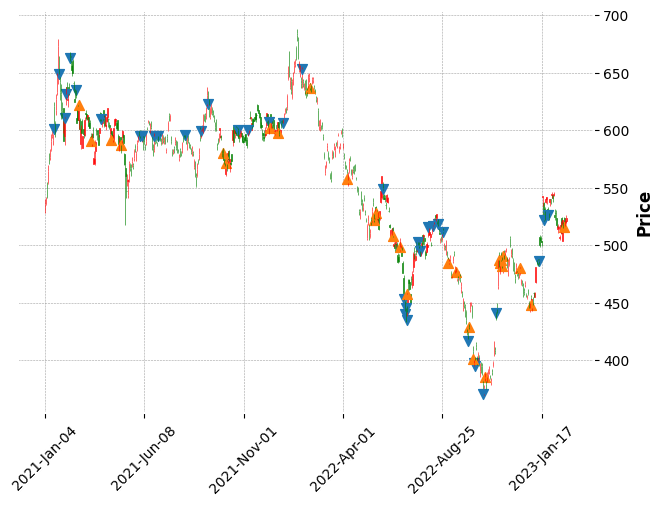

In [140]:
mc = mpf.make_marketcolors(up='r',
                           down='g',
                           edge='',
                           wick='inherit',
                           volume='inherit')
s = mpf.make_mpf_style(base_mpf_style='charles', marketcolors=mc)
addplot = [ mpf.make_addplot(buy_df, type='scatter', markersize=50, marker='v'),
            mpf.make_addplot(sell_df, type='scatter', markersize=50, marker='^') ]
mpf.plot(arr_df, addplot=addplot, type='candle', style=s)

In [142]:
arr_df['balance']
balance_df = arr_df['balance']

In [155]:
new_df = arr_df['balance']

In [160]:
new_df = new_df.dropna()

In [161]:
import matplotlib.pyplot as plt
new_df

Date
2021-01-04        0.0
2021-01-15        0.0
2021-01-22       48.0
2021-02-01      -66.0
2021-02-02       81.0
               ...   
2022-12-30   -32653.0
2023-01-12   -27941.0
2023-01-31   -23504.0
2023-02-06   -22996.0
2023-03-03   -24306.0
Name: balance, Length: 67, dtype: float64

Text(0, 0.5, 'balance')

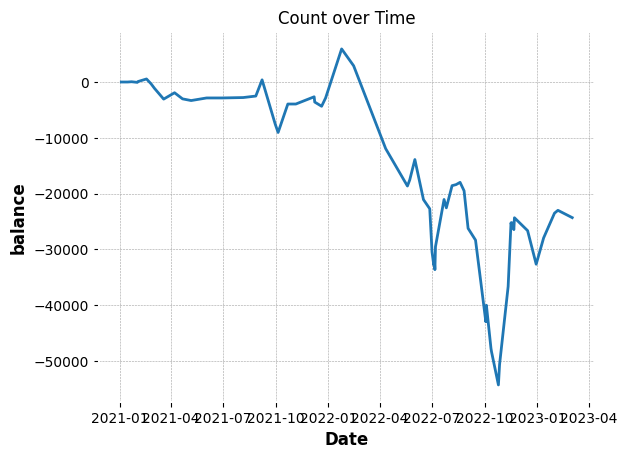

In [164]:
plt.plot(new_df)

# 設定圖表標題和軸標籤
plt.title('Balance over Time')
plt.xlabel('Date')
plt.ylabel('Balance')